In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
excel_file_path=r'C:\Users\arsha001\Documents\saxion\data\sales by store.xlsx'
sales_data = pd.read_excel(excel_file_path)

In [6]:
print(sales_data)

Columns  transaction_id           transaction_date     transaction_time  \
0                     1      donderdag 8 juni 2017  31-12-1899 08:33:55   
1                     1     donderdag 9 maart 2017  31-12-1899 10:01:24   
2                     1         dinsdag 9 mei 2017  31-12-1899 10:01:24   
3                     1        vrijdag 9 juni 2017  31-12-1899 10:01:24   
4                     1  donderdag 9 november 2017  31-12-1899 10:01:24   
...                 ...                        ...                  ...   
907836             4203  zaterdag 25 augustus 2018  31-12-1899 14:46:23   
907837             4203    zondag 25 november 2018  31-12-1899 14:46:23   
907838             4203   maandag 25 februari 2019  31-12-1899 14:46:23   
907839             4203      maandag 25 maart 2019  31-12-1899 14:46:23   
907840             4203    donderdag 25 april 2019  31-12-1899 14:46:23   

Columns  store_id  staff_id  customer_id instore_yn  order  line_item_id  \
0               3      

In [3]:
count = sales_data.count()
count_df = count.to_frame(name='Row_count')
count_df.index.name = 'Columns'
print(count_df)

                  Row_count
Columns                    
transaction_id       907841
transaction_date     907841
transaction_time     907841
store_id             907841
staff_id             907841
customer_id          907841
instore_yn           907841
order                907841
line_item_id         907841
product_id           907841
quantity_sold        907841
unit_price           907841
promo_item_yn        907841
total_revenue        907841


In [7]:
## Descriptive Statistics for 'quantity_sold'
quantity_sold_stats = sales_data['quantity_sold'].describe()
print("Quantity Sold Statistics:\n", quantity_sold_stats)
quantity_sold_skewness = sales_data['quantity_sold'].skew()
print("\nQuantity Sold Skewness:", quantity_sold_skewness)
quantity_sold_kurtosis = sales_data['quantity_sold'].kurtosis()
print("Quantity Sold Kurtosis:", quantity_sold_kurtosis)

## Descriptive Statistics for 'unit price'
unit_price_stats = sales_data['unit_price'].describe()
print("\nUnit Price Statistics:\n", unit_price_stats)
unit_price_skewness = sales_data['unit_price'].skew()
print("\nUnit Price Skewness:", unit_price_skewness)
unit_price_kurtosis = sales_data['unit_price'].kurtosis()
print("Unit Price Kurtosis:", unit_price_kurtosis)


Quantity Sold Statistics:
 count    907841.000000
mean          1.438178
std           0.542049
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           8.000000
Name: quantity_sold, dtype: float64

Quantity Sold Skewness: 0.7796820429268395
Quantity Sold Kurtosis: 0.5413554583036762

Unit Price Statistics:
 count    907841.000000
mean          3.340351
std           2.705177
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          45.000000
Name: unit_price, dtype: float64

Unit Price Skewness: 8.079411718769867
Unit Price Kurtosis: 92.56872284051467


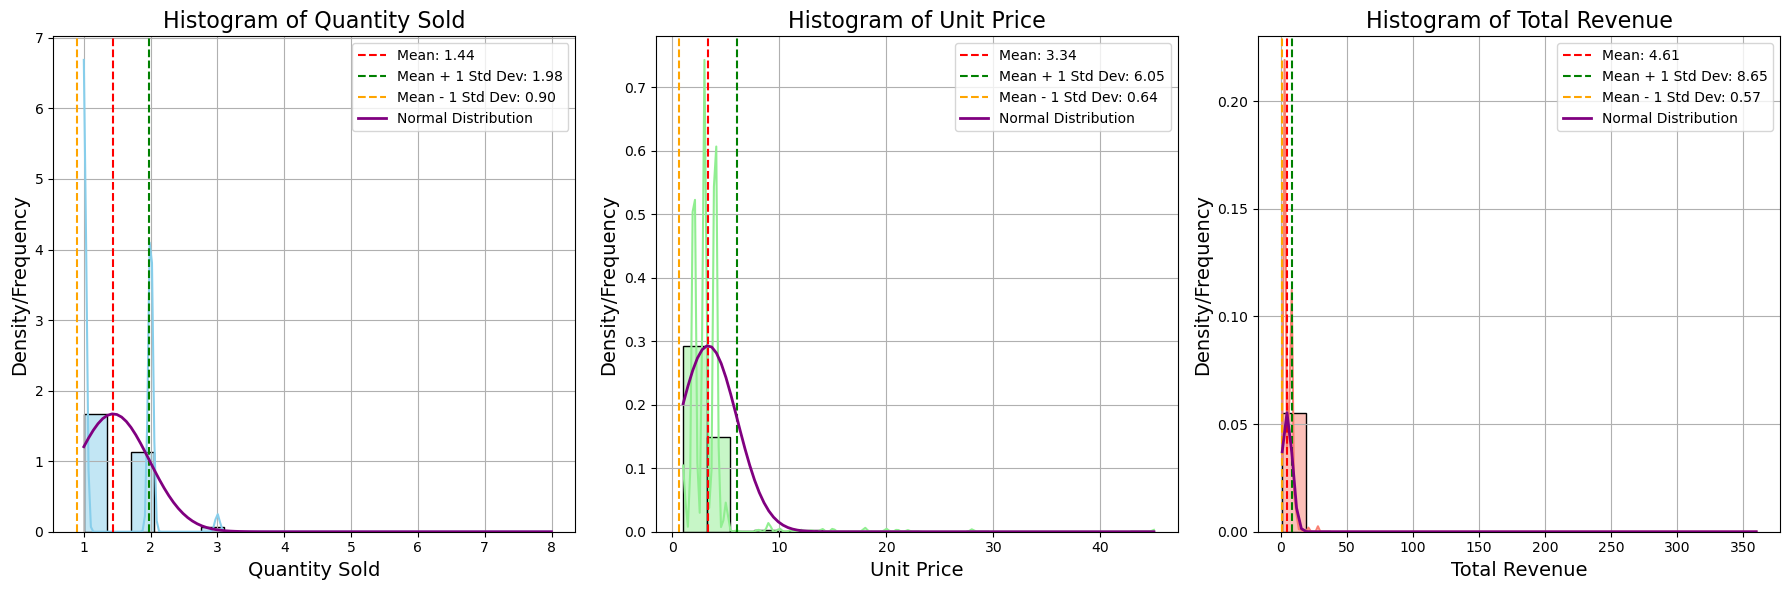

In [11]:
#Histograms and Distribution Insights
from scipy.stats import norm
sales_data['total_revenue'] = pd.to_numeric(sales_data['total_revenue'], errors='coerce')
sales_data['unit_price'] = pd.to_numeric(sales_data['unit_price'], errors='coerce')
sales_data['quantity_sold'] = pd.to_numeric(sales_data['quantity_sold'], errors='coerce')
cleaned_data = sales_data[['quantity_sold', 'unit_price', 'total_revenue']].dropna()

# Create a function to plot histograms for each column
def plot_histograms():
    columns = ['quantity_sold', 'unit_price', 'total_revenue']
    titles = ['Histogram of Quantity Sold', 'Histogram of Unit Price', 'Histogram of Total Revenue']
    xlabels = ['Quantity Sold', 'Unit Price', 'Total Revenue']
    
    colors = ['skyblue', 'lightgreen', 'salmon']
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns
    
    for ax, column, title, xlabel, color in zip(axes, columns, titles, xlabels, colors):
        # Plot histogram
        sns.histplot(cleaned_data[column], bins=20, kde=True, ax=ax, color=color, edgecolor='black', stat='density')
        
        # Calculate mean and standard deviation
        mean = cleaned_data[column].mean()
        std_dev = cleaned_data[column].std()

        # Plot mean line
        ax.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
        ax.axvline(mean + std_dev, color='green', linestyle='--', label=f'Mean + 1 Std Dev: {mean + std_dev:.2f}')
        ax.axvline(mean - std_dev, color='orange', linestyle='--', label=f'Mean - 1 Std Dev: {mean - std_dev:.2f}')
       
        x_values = np.linspace(cleaned_data[column].min(), cleaned_data[column].max(), 100)
        # Calculate normal distribution based on mean and std dev
        normal_dist = norm.pdf(x_values, mean, std_dev)

        normal_dist *= np.max(np.histogram(cleaned_data[column], bins=20, density=True)[0]) / np.max(normal_dist)
        
        ax.plot(x_values, normal_dist, color='purple', label='Normal Distribution', linewidth=2)

        ax.set_title(title, fontsize=16)
        ax.set_xlabel(xlabel, fontsize=14)
        ax.set_ylabel('Density/Frequency', fontsize=14)
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout()  
    plt.show()
plot_histograms()

Quantity Sold:
  Q1: 1.00, Q2 (Median): 1.00, Q3: 2.00, IQR: 1.00
Unit Price:
  Q1: 2.00, Q2 (Median): 3.00, Q3: 4.00, IQR: 2.00
Total Revenue:
  Q1: 3.00, Q2 (Median): 4.00, Q3: 6.00, IQR: 3.00


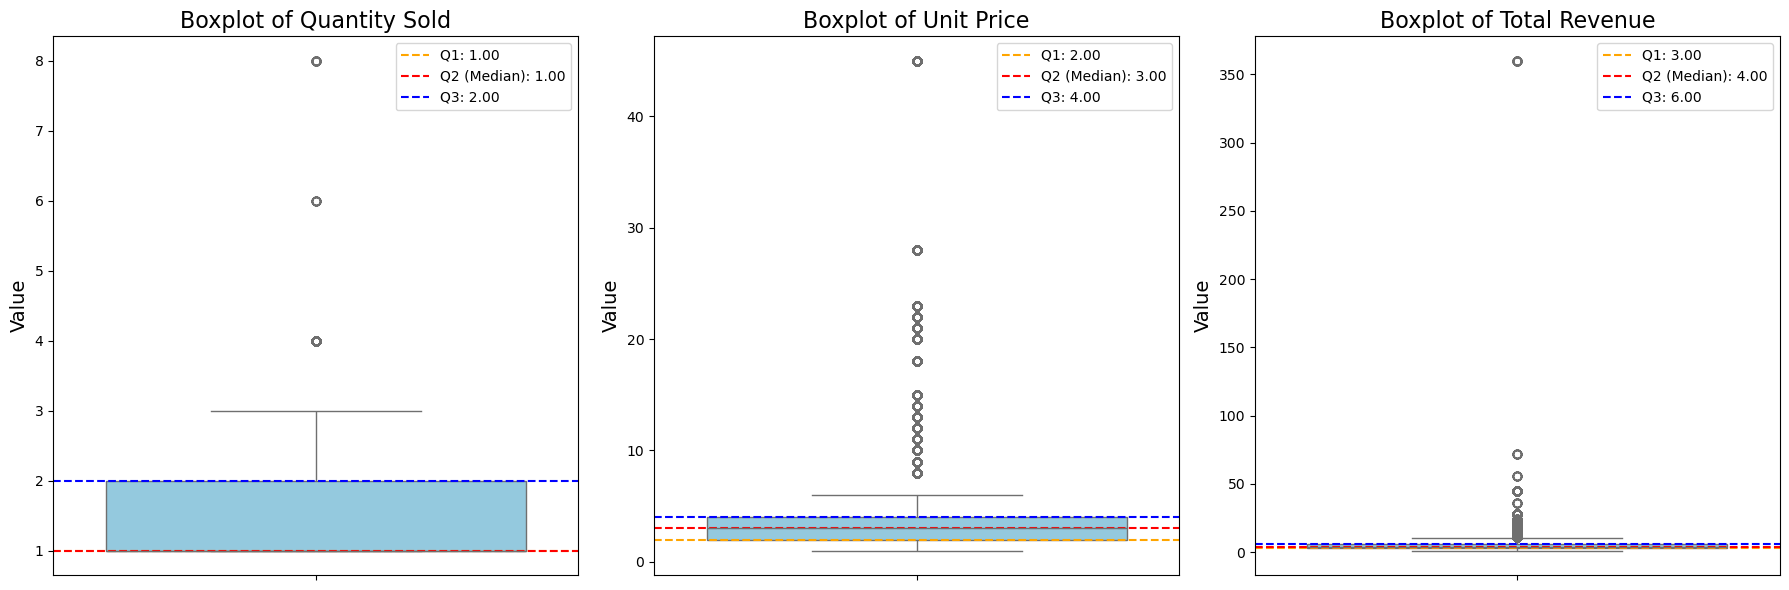

In [13]:
# create  Boxplot

sales_data['total_revenue'] = pd.to_numeric(sales_data['total_revenue'], errors='coerce')
sales_data['unit_price'] = pd.to_numeric(sales_data['unit_price'], errors='coerce')
sales_data['quantity_sold'] = pd.to_numeric(sales_data['quantity_sold'], errors='coerce')
cleaned_data = sales_data[['quantity_sold', 'unit_price', 'total_revenue']].dropna()

# Create a function to plot box plots with Q1, Q2, and IQR
def plot_boxplots():
    columns = ['quantity_sold', 'unit_price', 'total_revenue']
    titles = ['Quantity Sold', 'Unit Price', 'Total Revenue']
    
    # Set up the subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  
    
    for i, column in enumerate(columns):
        # Calculate Q1, Q2, and IQR
        Q1 = cleaned_data[column].quantile(0.25)
        Q2 = cleaned_data[column].quantile(0.50)  # Median
        Q3 = cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1

        print(f"{titles[i]}:")
        print(f"  Q1: {Q1:.2f}, Q2 (Median): {Q2:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")

        sns.boxplot(data=cleaned_data[column], ax=axes[i], color='skyblue')
        axes[i].set_title(f'Boxplot of {titles[i]}', fontsize=16)
        axes[i].set_ylabel('Value', fontsize=14)

        axes[i].axhline(Q1, color='orange', linestyle='--', label=f'Q1: {Q1:.2f}')
        axes[i].axhline(Q2, color='red', linestyle='--', label=f'Q2 (Median): {Q2:.2f}')
        axes[i].axhline(Q3, color='blue', linestyle='--', label=f'Q3: {Q3:.2f}')
        axes[i].legend()

    plt.tight_layout()  
    plt.show()
plot_boxplots()


Correlation between Quantity Sold and Total Revenue: 0.34
Correlation between Unit Price and Total Revenue: 0.71


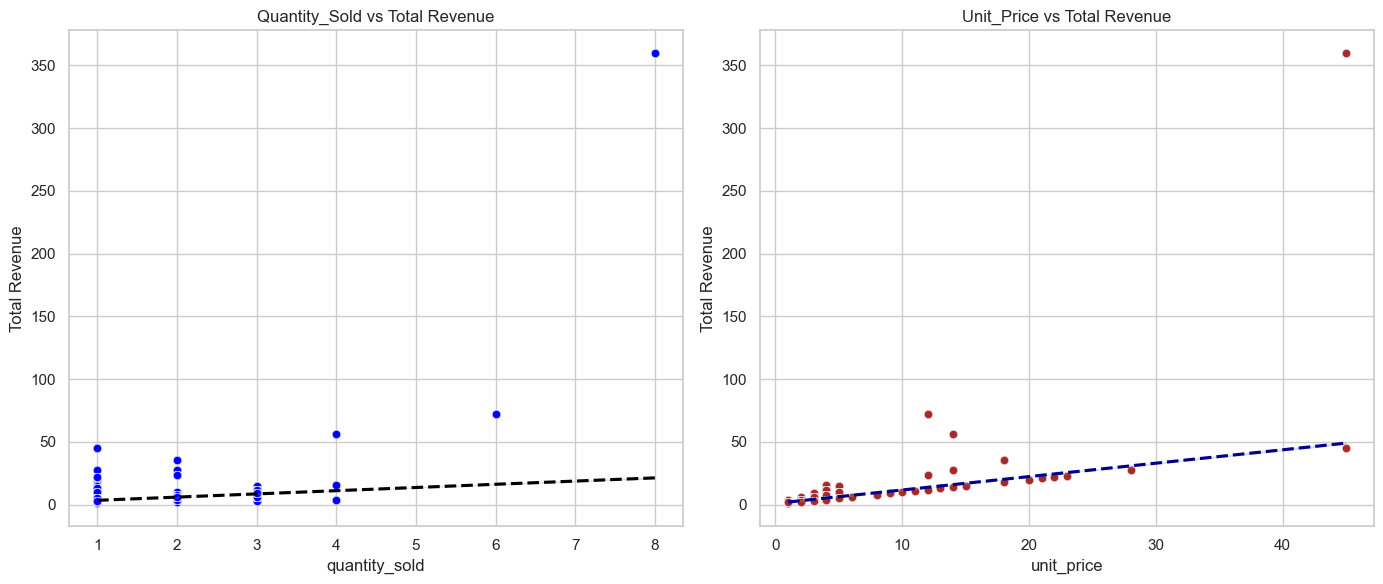

In [14]:
#Correlation Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_quantity = sales_data[['quantity_sold', 'total_revenue']].corr().iloc[0, 1]
correlation_unit_price = sales_data[['unit_price', 'total_revenue']].corr().iloc[0, 1]

print(f"Correlation between Quantity Sold and Total Revenue: {correlation_quantity:.2f}")
print(f"Correlation between Unit Price and Total Revenue: {correlation_unit_price:.2f}")

plt.figure(figsize=(14, 6))
# Plot 1: Quantity Sold vs Total Revenue
plt.subplot(1, 2, 1)
sns.scatterplot(x='quantity_sold', y='total_revenue', data=sales_data, color='blue', alpha=0.6)
sns.regplot(x='quantity_sold', y='total_revenue', data=sales_data, scatter=False, color='black', line_kws={'linestyle':'--'})
plt.title('Quantity_Sold vs Total Revenue')
plt.xlabel('quantity_sold')
plt.ylabel('Total Revenue')

# Plot 2: Unit Price vs Total Revenue
plt.subplot(1, 2, 2)
sns.scatterplot(x='unit_price', y='total_revenue', data=sales_data, color='brown', alpha=0.6)
sns.regplot(x='unit_price', y='total_revenue', data=sales_data, scatter=False, color='darkblue', line_kws={'linestyle':'--'})
plt.title('Unit_Price vs Total Revenue')
plt.xlabel('unit_price')
plt.ylabel('Total Revenue')

plt.tight_layout()
plt.show()


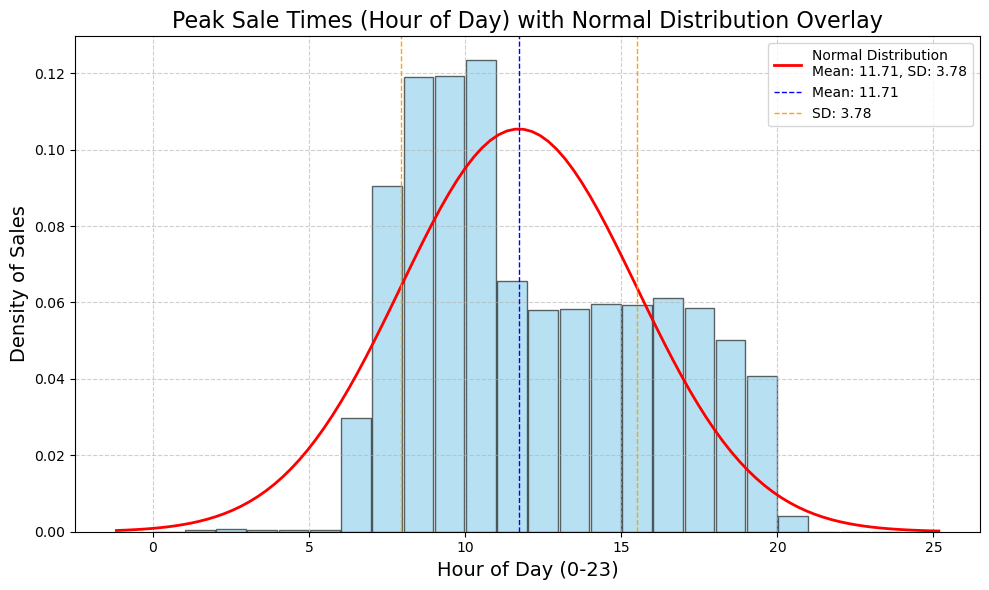

In [22]:
#Peak Sale Times
from scipy.stats import norm

sales_data.columns = sales_data.columns.str.strip().str.lower()

# Convert 'transaction_time' to datetime, handling errors
sales_data['transaction_time'] = pd.to_datetime(sales_data['transaction_time'], errors='coerce')

# Extract the hour of the day from 'transaction_time'
sales_data['sale_hour'] = sales_data['transaction_time'].dt.hour

# Calculate mean and standard deviation of sale hours
mean_hour = sales_data['sale_hour'].mean()
std_hour = sales_data['sale_hour'].std()

plt.figure(figsize=(10, 6))
bins = np.arange(0, 25)  # 0 to 24 hours (25 bins, inclusive)
count, bins, _ = plt.hist(sales_data['sale_hour'], bins=bins, color='skyblue', edgecolor='black', alpha=0.6, density=True, rwidth=0.95)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_hour, std_hour)
plt.plot(x, p, 'r-', linewidth=2, label=f'Normal Distribution\nMean: {mean_hour:.2f}, SD: {std_hour:.2f}')

# Annotate mean and standard deviation
plt.axvline(mean_hour, color='blue', linestyle='--', linewidth=1, label=f'Mean: {mean_hour:.2f}')
plt.axvline(mean_hour + std_hour, color='orange', linestyle='--', linewidth=1, label=f'SD: {std_hour:.2f}')
plt.axvline(mean_hour - std_hour, color='orange', linestyle='--', linewidth=1)

plt.title('Peak Sale Times (Hour of Day) with Normal Distribution Overlay', fontsize=16)
plt.xlabel('Hour of Day (0-23)', fontsize=14)
plt.ylabel('Density of Sales', fontsize=14)

plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [12]:
#In-Store vs. Online Sales: Split data into in-store and online
instore_sales = sales_data[sales_data['instore_yn'] == 'Y']
online_sales = sales_data[sales_data['instore_yn'] == 'N']

# Descriptive statistics for in-store sales
instore_stats = instore_sales['total_revenue'].describe()
instore_skew = instore_sales['total_revenue'].skew()

# Descriptive statistics for online sales
online_stats = online_sales['total_revenue'].describe()
online_skew = online_sales['total_revenue'].skew()

print("In-Store Sales Stats:\n", instore_stats)
print("In-Store Skewness:", instore_skew)

print("\nOnline Sales Stats:\n", online_stats)
print("Online Skewness:", online_skew)


In-Store Sales Stats:
 count    456263.000000
mean          4.591380
std           4.434331
min           1.000000
25%           3.000000
50%           4.000000
75%           6.000000
max         360.000000
Name: total_revenue, dtype: float64
In-Store Skewness: 43.35622451087748

Online Sales Stats:
 count    451578.000000
mean          4.629072
std           3.600053
min           1.000000
25%           3.000000
50%           4.000000
75%           6.000000
max         360.000000
Name: total_revenue, dtype: float64
Online Skewness: 24.76549417805615


In [4]:

# Group by store_id and calculate descriptive statistics
store_stats = sales_data.groupby('store_id')['total_revenue'].describe()

# Add skewness for each store
store_stats['skewness'] = sales_data.groupby('store_id')['total_revenue'].skew()
print(store_stats)

store_8_stats = store_stats.loc[8]
print(f"\nStore 8 Performance:\n{store_8_stats}")


             count      mean       std  min  25%  50%  75%    max   skewness
store_id                                                                    
3         308817.0  4.519104  3.004598  1.0  3.0  4.0  6.0   45.0   5.044278
5         291888.0  4.758781  3.356959  1.0  3.0  4.0  6.0   72.0   4.629644
8         307136.0  4.560380  5.333729  1.0  3.0  4.0  6.0  360.0  46.212942

Store 8 Performance:
count       307136.000000
mean             4.560380
std              5.333729
min              1.000000
25%              3.000000
50%              4.000000
75%              6.000000
max            360.000000
skewness        46.212942
Name: 8, dtype: float64


In [6]:
#Store-Level Performance

sales_data['total_sales'] = sales_data['quantity_sold'] * sales_data['unit_price']

#  Group by 'store_id' and calculate total sales for each store
store_sales = sales_data.groupby('store_id')['total_sales'].sum().reset_index()

# Calculate the total sales across all stores
total_sales_overall = store_sales['total_sales'].sum()

#  Calculate the percentage contribution of each store
store_sales['percentage_of_total'] = (store_sales['total_sales'] / total_sales_overall) * 100

# Sort stores by percentage of total sales in descending order 
store_sales = store_sales.sort_values(by='percentage_of_total', ascending=False)

print(store_sales)


   store_id  total_sales  percentage_of_total
2         8      1400657            33.466395
0         3      1395576            33.344993
1         5      1389031            33.188611


<Figure size 1200x600 with 0 Axes>

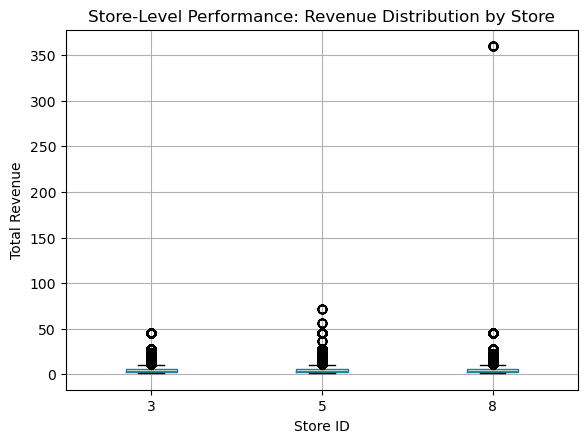

In [12]:
#Store-Level Performance boxplot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sales_data.boxplot(column='total_revenue', by='store_id', grid=True)

plt.title('Store-Level Performance: Revenue Distribution by Store')
plt.suptitle('')  
plt.xlabel('Store ID')
plt.ylabel('Total Revenue')
plt.show()



In [25]:
#Revenue Differences Across Stores Hypothesis Test
import pandas as pd
from scipy import stats

# Calculate total sales for each row (total_sales = quantity_sold * unit_price)
sales_data['total_sales'] = sales_data['quantity_sold'] * sales_data['unit_price']

# Group the sales data by store_id and calculate mean sales per store
mean_sales_by_store = sales_data.groupby('store_id')['total_sales'].mean()

print("Mean Sales for Each Store:")
print(mean_sales_by_store)

# Group the sales data by store_id for ANOVA analysis
store_sales = sales_data.groupby('store_id')['total_sales'].apply(list)

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*store_sales)

# Print the ANOVA results
print(f"\nANOVA Results:")
print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales across stores.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales across stores.")


Mean Sales for Each Store:
store_id
3    4.519104
5    4.758781
8    4.560380
Name: total_sales, dtype: float64

ANOVA Results:
F-statistic: 299.3132, P-value: 0.0000
Reject the null hypothesis: There is a significant difference in sales across stores.


In [4]:
# Calculate mean revenue for In-Store transactions
instore_mean_revenue = sales_data[sales_data['instore_yn'] == 'Y']['total_revenue'].mean()

# Calculate mean revenue for Online transactions
online_mean_revenue = sales_data[sales_data['instore_yn'] == 'N']['total_revenue'].mean()

# Calculate the difference between In-Store and Online revenue
revenue_difference = instore_mean_revenue - online_mean_revenue

print(f"In-Store Mean Revenue: {instore_mean_revenue}")
print(f"Online Mean Revenue: {online_mean_revenue}")
print(f"Difference in Mean Revenue: {revenue_difference}")


In-Store Mean Revenue: 4.591380409982839
Online Mean Revenue: 4.62907183255163
Difference in Mean Revenue: -0.03769142256879121


In [4]:

# Calculate total sales for each row (total_sales = quantity_sold * unit_price)
sales_data['total_sales'] = sales_data['quantity_sold'] * sales_data['unit_price']

#  Group the sales data by store_id and calculate mean sales per store
mean_sales_by_store = sales_data.groupby('store_id')['total_sales'].mean()
print("Mean Sales for Each Store:")
print(mean_sales_by_store)

#Group the sales data by store_id for ANOVA analysis
store_sales = sales_data.groupby('store_id')['total_sales'].apply(list)

#  Perform ANOVA
f_stat, p_value = stats.f_oneway(*store_sales)

print(f"\nANOVA Results:")
print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")

alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales across stores.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales across stores.")


Mean Sales for Each Store:
store_id
3    4.519104
5    4.758781
8    4.560380
Name: total_sales, dtype: float64

ANOVA Results:
F-statistic: 299.3132, P-value: 0.0000
Reject the null hypothesis: There is a significant difference in sales across stores.


In [10]:
#calculate  first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for both quantity_sold and unit_price

# Calculate statistics for 'quantity_sold'
mean_qty = sales_data['quantity_sold'].mean()
q1_qty, q3_qty = sales_data['quantity_sold'].quantile([0.25, 0.75])
iqr_qty = q3_qty - q1_qty

# Calculate statistics for 'unit_price'
mean_price = sales_data['unit_price'].mean()
q1_price, q3_price = sales_data['unit_price'].quantile([0.25, 0.75])
iqr_price = q3_price - q1_price

# Print results for 'quantity_sold'
print("Quantity Sold Statistics:")
print(f"Mean Quantity Sold: {mean_qty:.2f}")
print(f"Q1 (25th Percentile) of Quantity Sold: {q1_qty:.2f}")
print(f"Q3 (75th Percentile) of Quantity Sold: {q3_qty:.2f}")
print(f"IQR (Interquartile Range) of Quantity Sold: {iqr_qty:.2f}")

print("\n------------------------------------\n")

# Print results for 'unit_price'
print("Unit Price Statistics:")
print(f"Mean Unit Price: {mean_price:.2f}")
print(f"Q1 (25th Percentile) of Unit Price: {q1_price:.2f}")
print(f"Q3 (75th Percentile) of Unit Price: {q3_price:.2f}")
print(f"IQR (Interquartile Range) of Unit Price: {iqr_price:.2f}")


Quantity Sold Statistics:
Mean Quantity Sold: 1.44
Q1 (25th Percentile) of Quantity Sold: 1.00
Q3 (75th Percentile) of Quantity Sold: 2.00
IQR (Interquartile Range) of Quantity Sold: 1.00

------------------------------------

Unit Price Statistics:
Mean Unit Price: 3.34
Q1 (25th Percentile) of Unit Price: 2.00
Q3 (75th Percentile) of Unit Price: 4.00
IQR (Interquartile Range) of Unit Price: 2.00


In [6]:
#Revenue Differences Across Stores Hypothesis Test
import statsmodels.api as sm
sales_data['total_sales'] = sales_data['quantity_sold'] * sales_data['unit_price']

#  Define dependent variable (Y) and independent variables (X)
X = sales_data[['store_id', 'unit_price', 'quantity_sold']]
Y = sales_data['total_sales']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

#  regression model
model = sm.OLS(Y, X).fit()
print(f"F-statistic:  P-value: {p_value:.4f}")
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales across stores.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales across stores.")

model_summary = model.summary()
print(model_summary)


F-statistic:  P-value: 0.0000
Reject the null hypothesis: There is a significant difference in sales across stores.
                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                 7.263e+05
Date:                Fri, 25 Oct 2024   Prob (F-statistic):               0.00
Time:                        10:33:15   Log-Likelihood:            -2.0004e+06
No. Observations:              907841   AIC:                         4.001e+06
Df Residuals:                  907837   BIC:                         4.001e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------

In [22]:
#n-Store vs. Online Sales Hypothesis Test
import pandas as pd
import scipy.stats as stats

# Split data into In-Store and Online groups
instore_data = sales_data[sales_data['instore_yn'] == 'Y']
online_data = sales_data[sales_data['instore_yn'] == 'N']

# Function to perform T-test and ANOVA for a given column
def perform_tests(column_name):
    # Two-sample T-test (Independent T-test)
    t_stat, p_value = stats.ttest_ind(instore_data[column_name], online_data[column_name], equal_var=False)
    
    # ANOVA 
    f_stat, anova_p_value = stats.f_oneway(instore_data[column_name], online_data[column_name])
    
    return t_stat, p_value, f_stat, anova_p_value

# Calculate statistics for Total Revenue, Unit Price, and Quantity Sold
columns_to_test = ['total_revenue', 'unit_price', 'quantity_sold']
results = {}

for column in columns_to_test:
    t_stat, p_value, f_stat, anova_p_value = perform_tests(column)
    results[column] = {
        'T-Statistic': t_stat,
        'P-Value (T-test)': p_value,
        'F-Value': f_stat,
        'P-Value (ANOVA)': anova_p_value
    }


for column, stats in results.items():
    print(f"\n=== {column.replace('_', ' ').title()} ===")
    print(f"T-Statistic: {stats['T-Statistic']:.4f}")
    print(f"P-Value (T-test): {stats['P-Value (T-test)']:.4f}")
    print(f"F-Value: {stats['F-Value']:.4f}")
    print(f"P-Value (ANOVA): {stats['P-Value (ANOVA)']:.4f}")



=== Total Revenue ===
T-Statistic: -4.4483
P-Value (T-test): 0.0000
F-Value: 19.7451
P-Value (ANOVA): 0.0000

=== Unit Price ===
T-Statistic: -3.1972
P-Value (T-test): 0.0014
F-Value: 10.2243
P-Value (ANOVA): 0.0014

=== Quantity Sold ===
T-Statistic: -9.3620
P-Value (T-test): 0.0000
F-Value: 87.6467
P-Value (ANOVA): 0.0000


In [27]:
# Impact of Promotions on Sales Hypothesis Test
import scipy.stats as stats

# Split data into Promotional and Non-Promotional groups
promo_data = sales_data[sales_data['promo_item_yn'] == 'Y']
non_promo_data = sales_data[sales_data['promo_item_yn'] == 'N']

# Function to perform T-test and ANOVA for a given column
def perform_promotion_tests(column_name):
    # Two-sample T-test (Independent T-test)
    t_stat, p_value = stats.ttest_ind(promo_data[column_name], non_promo_data[column_name], equal_var=False)
    
    # ANOVA (One-Way)
    f_stat, anova_p_value = stats.f_oneway(promo_data[column_name], non_promo_data[column_name])
    
    return t_stat, p_value, f_stat, anova_p_value

# Calculate statistics for Total Revenue, Unit Price, and Quantity Sold
columns_to_test = ['total_revenue', 'unit_price', 'quantity_sold']
promo_results = {}
alpha = 0.05  # Significance level

for column in columns_to_test:
    t_stat, p_value, f_stat, anova_p_value = perform_promotion_tests(column)
    # Store the results in a dictionary
    promo_results[column] = {
        'T-Statistic': t_stat,
        'P-Value (T-test)': p_value,
        'F-Value': f_stat,
        'P-Value (ANOVA)': anova_p_value,
        'Reject H0 (T-test)': 'Reject H0' if p_value < alpha else 'Fail to Reject H0',
        'Reject H0 (ANOVA)': 'Reject H0' if anova_p_value < alpha else 'Fail to Reject H0'
    }

# Display the results with decision
for column, stats in promo_results.items():
    print(f"\n=== {column.replace('_', ' ').title()} ===")
    print(f"T-Statistic: {stats['T-Statistic']:.4f}")
    print(f"P-Value (T-test): {stats['P-Value (T-test)']:.4f}")
    print(f"Decision (T-test): {stats['Reject H0 (T-test)']}")
    print(f"F-Value: {stats['F-Value']:.4f}")
    print(f"P-Value (ANOVA): {stats['P-Value (ANOVA)']:.4f}")
    print(f"Decision (ANOVA): {stats['Reject H0 (ANOVA)']}")



=== Total Revenue ===
T-Statistic: -77.1966
P-Value (T-test): 0.0000
Decision (T-test): Reject H0
F-Value: 946.0609
P-Value (ANOVA): 0.0000
Decision (ANOVA): Reject H0

=== Unit Price ===
T-Statistic: -141.5484
P-Value (T-test): 0.0000
Decision (T-test): Reject H0
F-Value: 897.7400
P-Value (ANOVA): 0.0000
Decision (ANOVA): Reject H0

=== Quantity Sold ===
T-Statistic: -18.6145
P-Value (T-test): 0.0000
Decision (T-test): Reject H0
F-Value: 370.8944
P-Value (ANOVA): 0.0000
Decision (ANOVA): Reject H0


In [26]:
#In-Store vs. Online Sales Hypothesis Test
import pandas as pd
import scipy.stats as stats


# Split data into In-Store and Online groups
instore_data = sales_data[sales_data['instore_yn'] == 'Y']
online_data = sales_data[sales_data['instore_yn'] == 'N']

# Function to perform T-test and ANOVA for a given column
def perform_tests(column_name):
    # Two-sample T-test (Independent T-test)
    t_stat, p_value = stats.ttest_ind(instore_data[column_name], online_data[column_name], equal_var=False)
    
    # ANOVA 
    f_stat, anova_p_value = stats.f_oneway(instore_data[column_name], online_data[column_name])
    
    return t_stat, p_value, f_stat, anova_p_value

# Calculate statistics for Total Revenue, Unit Price, and Quantity Sold
columns_to_test = ['total_revenue', 'unit_price', 'quantity_sold']
results = {}
alpha = 0.05  # significance level

for column in columns_to_test:
    t_stat, p_value, f_stat, anova_p_value = perform_tests(column)
    # Store the results in a dictionary
    results[column] = {
        'T-Statistic': t_stat,
        'P-Value (T-test)': p_value,
        'F-Value': f_stat,
        'P-Value (ANOVA)': anova_p_value,
        'Reject H0 (T-test)': 'Reject H0' if p_value < alpha else 'Fail to Reject H0',
        'Reject H0 (ANOVA)': 'Reject H0' if anova_p_value < alpha else 'Fail to Reject H0'
    }

# Display the results with decision
for column, stats in results.items():
    print(f"\n=== {column.replace('_', ' ').title()} ===")
    print(f"T-Statistic: {stats['T-Statistic']:.4f}")
    print(f"P-Value (T-test): {stats['P-Value (T-test)']:.4f}")
    print(f"Decision (T-test): {stats['Reject H0 (T-test)']}")
    print(f"F-Value: {stats['F-Value']:.4f}")
    print(f"P-Value (ANOVA): {stats['P-Value (ANOVA)']:.4f}")
    print(f"Decision (ANOVA): {stats['Reject H0 (ANOVA)']}")



=== Total Revenue ===
T-Statistic: -4.4483
P-Value (T-test): 0.0000
Decision (T-test): Reject H0
F-Value: 19.7451
P-Value (ANOVA): 0.0000
Decision (ANOVA): Reject H0

=== Unit Price ===
T-Statistic: -3.1972
P-Value (T-test): 0.0014
Decision (T-test): Reject H0
F-Value: 10.2243
P-Value (ANOVA): 0.0014
Decision (ANOVA): Reject H0

=== Quantity Sold ===
T-Statistic: -9.3620
P-Value (T-test): 0.0000
Decision (T-test): Reject H0
F-Value: 87.6467
P-Value (ANOVA): 0.0000
Decision (ANOVA): Reject H0


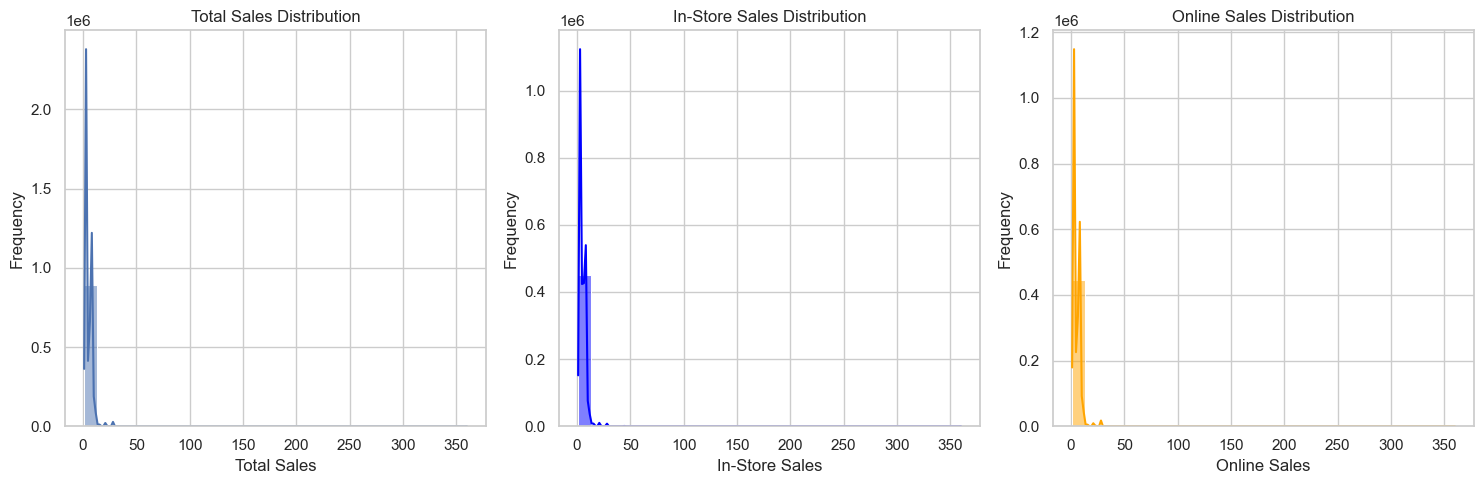

In [8]:
#In-Store vs. Online Sales Hypothesis Test

sales_data.columns = sales_data.columns.str.strip().str.lower()

instore_sales = sales_data[sales_data['instore_yn'] == 'Y']['total_sales']
online_sales = sales_data[sales_data['instore_yn'] == 'N']['total_sales']

sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))

# Histogram for total sales
plt.subplot(1, 3, 1)
sns.histplot(sales_data['total_sales'], bins=30, kde=True)
plt.title('Total Sales Distribution')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')

# Histogram for in-store sales
plt.subplot(1, 3, 2)
sns.histplot(instore_sales, bins=30, kde=True, color='blue')
plt.title('In-Store Sales Distribution')
plt.xlabel('In-Store Sales')
plt.ylabel('Frequency')

# Histogram for online sales
plt.subplot(1, 3, 3)
sns.histplot(online_sales, bins=30, kde=True, color='orange')
plt.title('Online Sales Distribution')
plt.xlabel('Online Sales')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


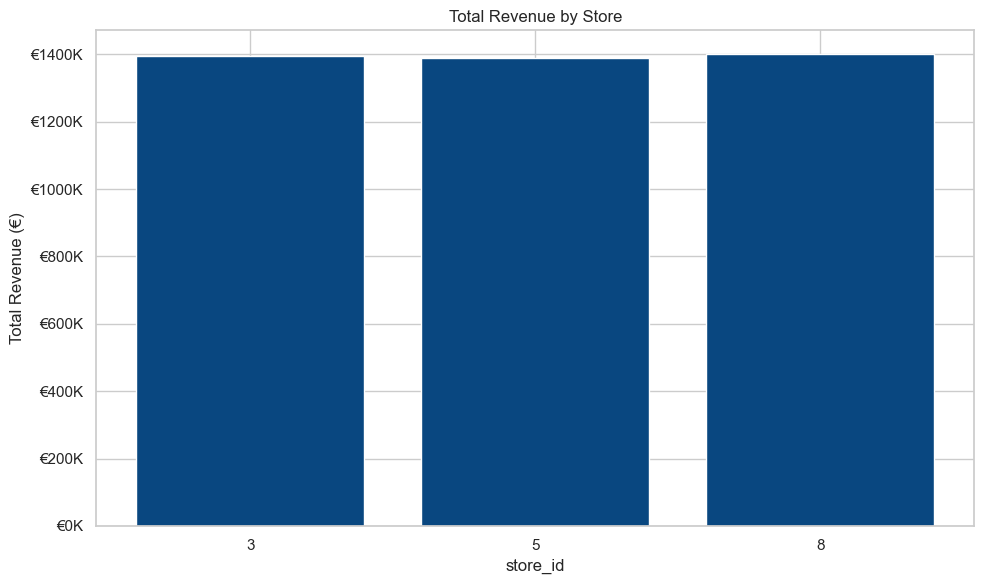

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by store_id and calculate total revenue for each store
revenue_by_store = sales_data.groupby('store_id')['total_revenue'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(revenue_by_store['store_id'].astype(str), revenue_by_store['total_revenue'], color='#094780')

plt.title('Total Revenue by Store')
plt.xlabel('store_id')
plt.ylabel('Total Revenue (€)')
plt.xticks(rotation=0)


plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'€{x/1e3:.0f}K'))
plt.tight_layout()
plt.show()

